In [1]:
from shapes import Point, Polygon, Rectangle
from environment import Environment2D
from utils import PlotTools
from graph import Graph
from lqr import LQRPlanner, DummyPlanner
import collections

import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# a = Point(0,0.5)
# b = Point(0,1)
# c = Point(0.5,1.5)
# d = Point(1,1)
# e = Point(1,0.5)
# f = Point(0.5,0)
# hexagon = Polygon(0, [a,b,c,d,e,f])

# a_ = Point(3,4)
# b_ = Point(3,5)
# c_ = Point(5,5)
# d_ = Point(4,3)
# square = Polygon(1, [a_,b_,c_,d_])

rec_0 = Rectangle(0, -2,2,5,3,0)
rec_1 = Rectangle(1, 4,6,4,2,0)
rec_2 = Rectangle(2, -2,-2,5,3,180)
rec_3 = Rectangle(3, 4,-1,4,2,-30)
rec_4 = Rectangle(4, -2,-7.5,3,5,-180)

x_lims = [-10,10]
y_lims = [-15,10]
env = Environment2D(x_lims, y_lims)

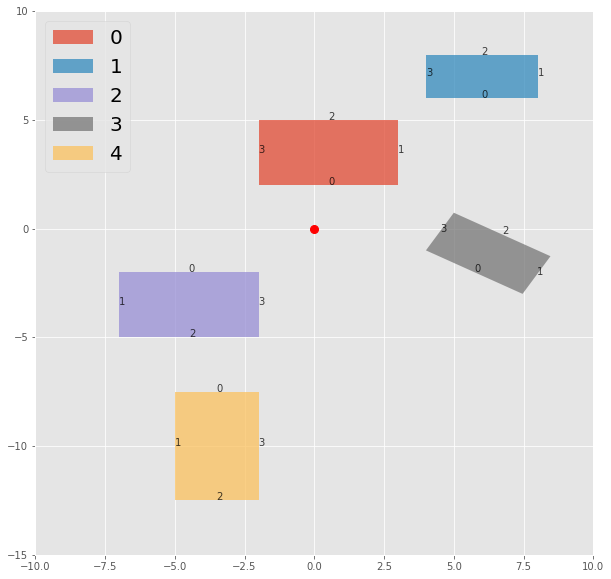

In [3]:
env.clear()
env.add_rectangles([rec_0, rec_1, rec_2, rec_3, rec_4])
p = Point(0,0)
# p1 = Point(0, -5)
# p2 = Point(-2.5, 0)
# p3 = Point(2.5, 0)
# p1.plot()
# p2.plot()
# p3.plot()
# triangle = Polygon(5, [p2, p3, p1])
# env.add_rectangle(triangle)
env.plot()
p.plot()

In [4]:
env.get_lines_seen(p)

{0: [0], 2: [3, 0], 3: [3, 0], 4: [3]}

In [33]:
# query = Point(1.5, 4.2)
# env.plot_min_proj(query)

In [45]:
x_init = np.array([5,5])
x_range = np.array([x_lims, y_lims])

In [46]:
dt = 0.2
A = np.eye(2); B = dt*np.eye(2); C = np.eye(2)
Q = np.eye(2)
R = np.eye(2)
lqr_planner = LQRPlanner(Q, R, A, B)
dummy_planner = DummyPlanner()

In [47]:
g = Graph(x_init, x_range, env, lqr_planner)

In [37]:
g.clear()
g.build(500,1.5)

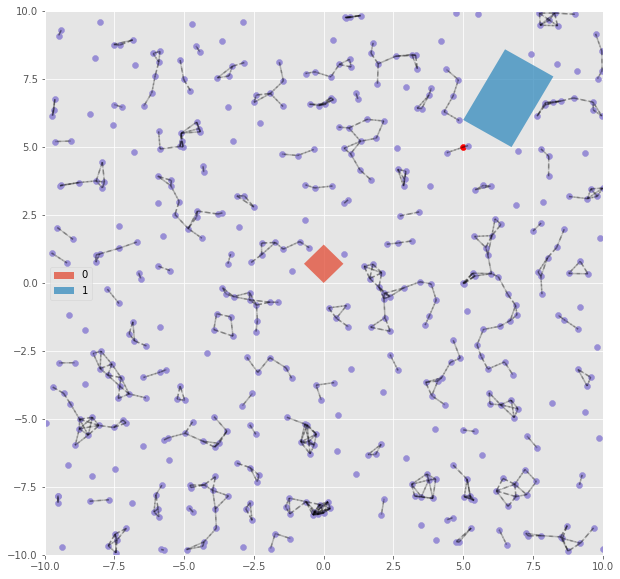

In [38]:
g.plot()